# Instructions

Read each question carefully and provide an appropriate answer in the following cells. Depending on the question, you may need to provide code or a text submission. **Be sure to label your answers with the question number for easy identification!**

In [112]:
#  Import the necessary dependencies.
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels.api as sm
import plotly.express as px
from scipy import stats

**Question 1: Create a code block that imports the `student.json` file into a Pandas dataframe named `grades`, then calculates the measures of central tendency for the final grades. (6 points)**

In [113]:
# Answer 1

grades = pd.read_json('Resources/student.json')
Describe = grades.describe()
Median = grades.median()
print(Describe)
print (Median)

       Midterm Exam  Midterm Paper  Final Exam  Final Paper  Final Grade
count     24.000000      24.000000   24.000000    24.000000    24.000000
mean      71.708333      73.958333   78.458333    69.000000    73.333333
std       19.523629      20.964731   19.049088    19.392962    14.445299
min       41.000000      42.000000   43.000000    43.000000    49.000000
25%       53.750000      55.750000   66.250000    53.000000    59.750000
50%       72.000000      77.000000   87.500000    60.000000    74.500000
75%       89.250000      93.250000   92.250000    87.000000    85.000000
max      100.000000     100.000000  100.000000   100.000000    96.000000
Midterm Exam     72.0
Midterm Paper    77.0
Final Exam       87.5
Final Paper      60.0
Final Grade      74.5
dtype: float64


C:\Users\yet89\AppData\Local\Temp/ipykernel_14828/1213732067.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



**Question 2: Create a code block that imports the `2020_Car_mpg.xlsx` file into a Pandas dataframe named `fuel_data`, then creates a histogram of for all the City mpg of all 6 cylinder vehicles, and tests for normal distribution. (6 points)**

NormaltestResult(statistic=81.66604136829349, pvalue=1.8469044913824772e-18)

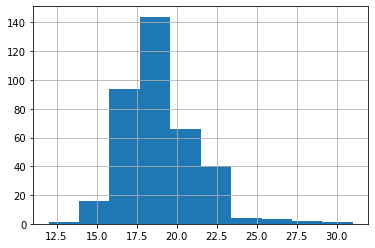

In [114]:
fuel_data = pd.read_excel('Resources/2020_Car_mpg.xlsx')
fuel_data.head()
fuel_data = fuel_data[fuel_data['# Cyl']==6]
fuel_data['City(mpg)'].hist()
stats.normaltest(fuel_data['City(mpg)'])
#Not a normal distribution, p value small, we can reject normality
#fuel_data.hist(by='')

**Question 3: Which of the following statements calculates the correlation coefficient? (2 points):**

A. 
```python
import scipy.stats as sts
sts.pearson()
```

B.
```python
import scipy.stats as sts
sts.corr()
```

C. 
```python
import scipy.stats as sts
sts.spearmanr()
```

D. 
```python
import scipy.stats as sts
sts.pearsonr()
```

In [115]:
# Answer 3 
#D

**Question 4: Create a code block that performs the following operations: (10 points)**

   1. Import the `2020_Car_mpg.xlsx` file into a Pandas dataframe called `fuel_data`.
   
   2. Drop the `Mfr Name`, `Division`, and `Carline` columns.
   
   3. Using the `OLS()` regression model from the Statsmodels library, create a multiple linear regression model that determines if the number of cylinders in a vehicle affects the city, highway and combined mpg of the vehicle.
  

In [116]:
# Answer 4.
fuel_data = pd.read_excel('Resources/2020_Car_mpg.xlsx')
fuel_data.drop(['Mfr Name','Division','Carline'],axis=1)
x1 = fuel_data['City(mpg)']
x2 = fuel_data['Hwy(mpg)']
x3 = fuel_data['Combined(mpg)']
X= fuel_data[['City(mpg)','Hwy(mpg)','Combined(mpg)']]
y1 = fuel_data['# Cyl']

model = sm.OLS(y1,X)
results=model.fit()
print(results.summary())
#Maybe I'm misreading the question but since this is a multiple linear regression there'll be multiple independent variables
#and in this case since the question grouped city, hwy, and combined together, I put them down as the independent variables.

                                 OLS Regression Results                                
Dep. Variable:                  # Cyl   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              1659.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):                        0.00
Time:                        23:51:08   Log-Likelihood:                         -2770.8
No. Observations:                1168   AIC:                                      5548.
Df Residuals:                    1165   BIC:                                      5563.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

**Question 5: Create a code block that imports the `donors2008.csv` file into a Pandas DataFrame called `donors_df`, then calculates the interquartile range (IQR) and where the outliers would lie. (6 points)**

In [117]:
# Answer 5.
donors_df = pd.read_csv('Resources/donors2008.csv')
donors_df.describe()
#IQR = 200 - 500
#Upper outliers = 500+1.5*(500-200)=Values above 950
#Lower outliers = 500 - 1.5*(500-200)=Values below 50

,Amount,FIELD8
count,1776.000000,0.0
mean,659.311622,NaN
std,1274.416858,NaN
min,5.000000,NaN
25%,200.000000,NaN
50%,250.000000,NaN
75%,500.000000,NaN
max,5000.000000,NaN


**Question 6: Create a code block that performs the following operations: (10 points)**

1. Imports the `2020_Car_mpg.xlsx` file into a Pandas DataFrame called `fuel_data`.
2. Creates a box plot that compares each type of cylinder with the city mpg.
3. Creates individual groups for 3, 4, 6, 8, and 12 cylinder vehicles.
4. Performs ANOVA on all the groups.

In [118]:
# Box plot for Q6.
fuel_data = pd.read_excel('Resources/2020_Car_mpg.xlsx')
px.box(fuel_data, x='# Cyl', y= 'City(mpg)')


In [119]:
# ANOVA for Q6.
group1 = fuel_data[fuel_data['# Cyl'] == 3]['City(mpg)']
group2 = fuel_data[fuel_data['# Cyl'] == 4]['City(mpg)']
group3 = fuel_data[fuel_data['# Cyl'] == 6]['City(mpg)']
group4 = fuel_data[fuel_data['# Cyl'] == 8]['City(mpg)']
group5 = fuel_data[fuel_data['# Cyl'] == 12]['City(mpg)']
sts.f_oneway(group1, group2, group3, group4, group5)


F_onewayResult(statistic=247.08099956471924, pvalue=2.7092340292908863e-153)

**Question 7: Which of the following statements will compare the means of two independent populations, `pop1` and `pop2`, and does not assume equal population variance? (2 points):**

A. 
```python
import scipy.stats as sts
sts.ttest(pop1.mean(), pop2.mean())
```

B.
```python
import scipy.stats as sts
sts.ttest_ind(pop1, pop2, equal_var=False)
```

C. 
```python
import scipy.stats as sts
sts.ttest_ind(pop1.mean(), pop2.mean(), equal_var=False)
```

D. 
```python
import scipy.stats as sts
sts.ttest(pop1, pop2, equal_var=False)
```

In [120]:
# Answer 7
#C

**Question 8: Create a code block that performs the following operations: (8 points)**

1. Imports the `running_log.csv` file into a Pandas DataFrame called `running_df`.
2. Creates a scatter plot of miles versus calories with a trendline.
3. Calculate the linear regression results of the running data..

In [121]:
# Scatter plot for Q8.
running_df = pd.read_csv('Resources/running_log.csv')
scatter = px.scatter(running_df, x='Miles',y='Calories',trendline='ols')
scatter

In [122]:
# Linear regression for Q8.
X = running_df['Miles'].astype('float')
Y = running_df['Calories'].astype('float')
mod = sm.OLS(endog = Y, exog= X, data=running_df)
res = mod.fit()
print(res.summary)
#model = sm.OLS(Y,X)
#results = model.fit()
#print(results.summary)
#I give up, not sure why this OLS isn't working

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000017D213140D0>>
